## Simulation of EVA Oxygen Consumption Using Task-Based Metabolic Models



Extravehicular Activities (EVAs) are physically demanding operations that require precise planning to ensure astronaut safety. One critical factor is the management of oxygen supply throughout the EVA duration. Traditional models estimate oxygen needs based on general physiological parameters; however, a task-based approach provides greater accuracy for operational planning. 

This project aims to simulate EVA oxygen depletion using task-specific oxygen consumption rates validated by NASA's human performance data.

#### Assumptions:

Oxygen usage values are derived from:
- [NASA TM 19910001262 – Apollo Physiological Report](https://ntrs.nasa.gov/api/citations/19910001262/downloads/19910001262.pdf)
- [NASA Aerobic Capacity Evidence Report](https://humanresearchroadmap.nasa.gov/Evidence/reports/Aerobic.pdf)

    We use the standard conversion:
    > 1 liter O₂ ≈ 5 kcal → O₂ L/min = kcal/hr × 0.0033

| Task                 | kcal/hr | O₂ (L/min) |
|----------------------|---------|------------|
| Light EVA            | 180     | 180 x 0.0033 = 0.59       |
| Moderate EVA         | 234     | 234 x 0.0033 = 0.77       |
| Heavy EVA            | 270     | 270 x 0.0033 = 0.89       |
| Very Heavy EVA       | 300     | 300 x 0.0033 = 0.99       |

In [77]:
initial_o2 = 2 * 800 # NASA EMUs typically carry 800L oxygen per tank; 2 tanks are usually carried on EVAs

In [68]:
def eva_oxygen():
    o2_level = []
    bw = float(input("Enter astronaut body weight (kg):"))
    task_options = {
        "1": ("Light EVA", 180, 0.59), 
        "2": ("Moderate EVA", 234, 0.77), 
        "3": ("Heavy EVA", 270, 0.89), 
        "4": ("Very heavy EVA", 300, 0.99)
    }
    print("Select EVA task:")
    for key, (name, kcal, o2) in task_options.items():
        print(f"{key} for {name}  - {kcal} kcal/hr, O2 requirement {o2} L/min")
    task_choice = input("Enter selection:")
    if task_choice in task_options:
        task_name, kcal, o2_requirement = task_options[task_choice]
        print(o2_requirement)
    else:
        task_name, kcal, o2_requirement = task_options["2"]
        print(o2_requirement)
    o2_consumption = o2_requirement  # unit: l/minute
    current_o2 = initial_o2
    for t in range(0,721):  # simulating for an EVA of 12-hour duration
        print(f"{t}, {current_o2:.2f}")
        o2_level.append((t, current_o2))

        if current_o2 < 0.1 * initial_o2:
            print("CRITICAL ALERT: Abort current task and return to shuttle")
            break
        elif current_o2 < 0.25 *initial_o2:
            print("ALERT: Please complete current task ASAP and return to shuttle")
        current_o2 -= o2_consumption
        
    print(f"Final oxygen remaining: {current_o2:.2f} L")
    return o2_level

In [72]:
eva_oxygen = eva_oxygen()

Enter astronaut body weight (kg): 80


Select EVA task:
1 for Light EVA  - 180 kcal/hr, O2 requirement 0.59 L/min
2 for Moderate EVA  - 234 kcal/hr, O2 requirement 0.77 L/min
3 for Heavy EVA  - 270 kcal/hr, O2 requirement 0.89 L/min
4 for Very heavy EVA  - 300 kcal/hr, O2 requirement 0.99 L/min


Enter selection: 4


0.99
0, 800.00
1, 799.01
2, 798.02
3, 797.03
4, 796.04
5, 795.05
6, 794.06
7, 793.07
8, 792.08
9, 791.09
10, 790.10
11, 789.11
12, 788.12
13, 787.13
14, 786.14
15, 785.15
16, 784.16
17, 783.17
18, 782.18
19, 781.19
20, 780.20
21, 779.21
22, 778.22
23, 777.23
24, 776.24
25, 775.25
26, 774.26
27, 773.27
28, 772.28
29, 771.29
30, 770.30
31, 769.31
32, 768.32
33, 767.33
34, 766.34
35, 765.35
36, 764.36
37, 763.37
38, 762.38
39, 761.39
40, 760.40
41, 759.41
42, 758.42
43, 757.43
44, 756.44
45, 755.45
46, 754.46
47, 753.47
48, 752.48
49, 751.49
50, 750.50
51, 749.51
52, 748.52
53, 747.53
54, 746.54
55, 745.55
56, 744.56
57, 743.57
58, 742.58
59, 741.59
60, 740.60
61, 739.61
62, 738.62
63, 737.63
64, 736.64
65, 735.65
66, 734.66
67, 733.67
68, 732.68
69, 731.69
70, 730.70
71, 729.71
72, 728.72
73, 727.73
74, 726.74
75, 725.75
76, 724.76
77, 723.77
78, 722.78
79, 721.79
80, 720.80
81, 719.81
82, 718.82
83, 717.83
84, 716.84
85, 715.85
86, 714.86
87, 713.87
88, 712.88
89, 711.89
90, 710.90
91, 

#### Visualizing oxygen consumption

In [74]:
import matplotlib.pyplot as plt

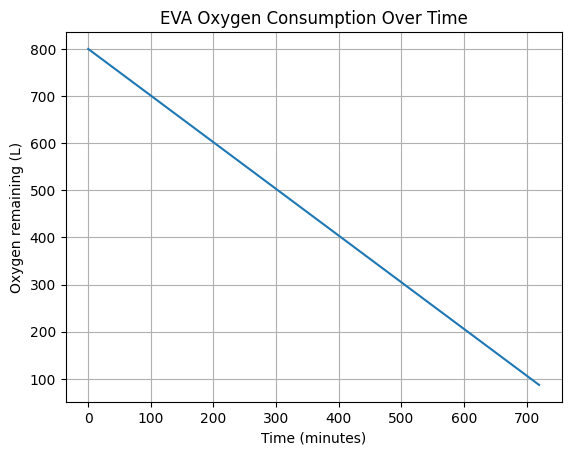

In [76]:
minutes = [t for t, o2 in eva_oxygen]
oxygen = [o2 for t, o2 in eva_oxygen]

plt.plot(minutes, oxygen)
plt.xlabel("Time (minutes)")
plt.ylabel("Oxygen remaining (L)")
plt.title("EVA Oxygen Consumption Over Time")
plt.grid(True)
plt.show()

This model simplifies EVA planning by using real-world data to estimate oxygen use. While effective for single-task EVAs, limitations include the assumption of constant exertion and the exclusion of CO2 buildup and suit system variables. 

Future improvements could integrate multiple task phases, real-time workload variation, and carbon dioxide load tracking. 

Additionally, although the current model does not incorporate astronaut body weight, future iterations could reintroduce it to allow scaling of oxygen consumption based on individual physiological differences.

#### References

NASA Technical Memorandum TM-19910001262. Apollo Flight Crew Physiological Performance Report. NASA JSC.

NASA Human Research Roadmap: Aerobic Capacity. https://humanresearchroadmap.nasa.gov/Evidence/reports/Aerobic.pdf

NASA Human Performance Standard 4.0. https://www.nasa.gov/reference/4-0-human-performance/